In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [24]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [25]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:,-1].values


In [26]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)


In [27]:
#Traning the SOM
from minisom import MiniSom

In [28]:
# 10X10 Grid
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = -0.5)

In [29]:
# initialize the Weights
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

In [30]:
#Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show

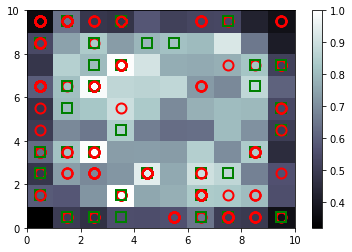

In [33]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r','g']
# i index for all the values in X dataset
# x is the row for that index
for i,x in enumerate(X):
    winning_node = som.winner(x)
    plot(winning_node[0] + 0.5,
         winning_node[1] + 0.5,
        markers[y[i]],
        markeredgecolor = colors[y[i]],
        markerfacecolor = 'None',
        markersize = 10,
        markeredgewidth = 2) # putting the market at the center of the square
show()

In [46]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8,1)], mappings[(6,8)]), axis = 0)
frauds = sc.inverse_transform(frauds)

ValueError: all the input arrays must have same number of dimensions